<a href="https://colab.research.google.com/github/lmrhody/femethodsS23/blob/main/week8notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Jupyter Notebook Assignment
## Programming Historian: Introduction to stylometry with Python

* Student Name: Michael Smith
* Date: 4/16/2023
* Instructor: Lisa Rhody
* Assignment due: 
* Methods of Text Analysis
* MA in DH / MS in Data Analysis and Visualization at The Graduate Center, CUNY

## Preparing for this week - Conceptualization
This week's assignment is going to veer more toward the technical than other weeks. We are going to read about a type of sylometric analysis called authorship attribution, and we're going to work through one of the most common authorship attribution tests in DH. 

### The following notebook is much indebted to and grateful for Programming Historian, and in particular, François Dominic Laramée. 
François Dominic Laramée, "Introduction to stylometry with Python," The Programming Historian 7 (2018), https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python.

### The assignment
This week, you will be working through one of the most common authorship attribution activities: Assessing the likely authorship of the disputed essays in _The Federalist Papers_. As you do so, consider the readings that you have done and how they come into conversation with the methods in this activity. The assignment will work through three different approaches to the same question using 3 different assumptions about language and measuring. You may work together to run the cells of the notebooks, but individual assignments should be completed individually. 

Your comments should reflect your consideration of what is happening functionally and theoretically throughout each experiment. Consider the following questions to help you get started: 
* Why did the author pick this particular dataset? 
* What about the selection of the dataset makes sense? What does the selection of data tell us about the kind of questions the authors expect users to have about their data? 
* There are three different approaches to estimating the likely authorship of one of the disputed essays. What are the assumptions that underlie each of the approaches to authorship attribution? 
* What are three different ways that "authorship" as a concept is measured? 
* Are there gendered inflections to these approaches? How so or why not? (Be sure to point to a specific cell. Give evidence from a secondary source to support your point of view.)
* How does the result of each experiment "answer" the question at hand? What appeal does the article make toward the authority or correctness of the answer? 
-- Another way to ask this question is: What are the features that seem to have the strongest correlation to authorship? 
* Given our discussion of what a "text" is, what might these tests of authorship be missing? 
* What are the advantages and/or disadvantages to using the *Federalist Papers* as the dataset we use to study ownership of language and authorship? What is assumed? What is ignored? 

### Directions: 
* To complete this lesson, go to the Programming Historian Lesson: [Introduction to sylometry with Python by François Dominic Laramée](https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python#calculating-features-and-z-scores-for-our-test-case) using your web browser. Keep this notebook page open on one side of your monitor and follow along with the Programming Historian lesson on the other side of your screen/monitor. 
* Download the zip file in the section titled [The Dataset](https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python#the-dataset). 
* Note: This Jupyter Notebook should be saved in the same folder as your Dataset folder.  
* Add new cells above and below the cells you are annotating and type your annotations in mark down.  



## Historical Context

As Patrick Juola writes: "Authorship Attribution is about ownership of words." What is at stake when we embark upon a process of trying to assign ownership to words? 

## Data Import and Preparation

In [1]:
import nltk
nltk.download('punkt')
import matplotlib

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24, 
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestCase': [64]
}


All files are downloaded and hosted in the directory 'data'

In [3]:
# A function that compiles all of the text files associated with a single author into a single string
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'data/federalist_{filename}.txt') as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [4]:
# Make a dictionary out of the authors' corpora
federalist_by_author = {}  
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)

In [7]:
for author in papers: 
    print(federalist_by_author[author][:40])

 10

The Same Subject Continued (The Uni
 1

General Introduction

For the Indepe
 2

Concerning Dangers from Foreign Forc
 18

The Same Subject Continued (The Ins
 49

Method of Guarding Against the Encr
 64

The Powers of the Senate

From The 


## First Stylometric Test: Mendenhall's Characteristic Curves of Composition

What is being measured? How? What assumptions are translated into measurable functions? 

All papers in an author's set have been placed into a single string. The string is tokenized into a list of words while removing all punctuation. Then each word's length is counted and added to each counts' total. This effectively gives a dictionary of word lengths with the corresponding counts for each length. This is finally plotted on a curve to show the distribution of word lengths across all papers. Still needed is a normalization of the counts per 100 or 1000 words as Hamilton has many more authored papers. Though even without this the shape of each curve should 'unique' to the author.


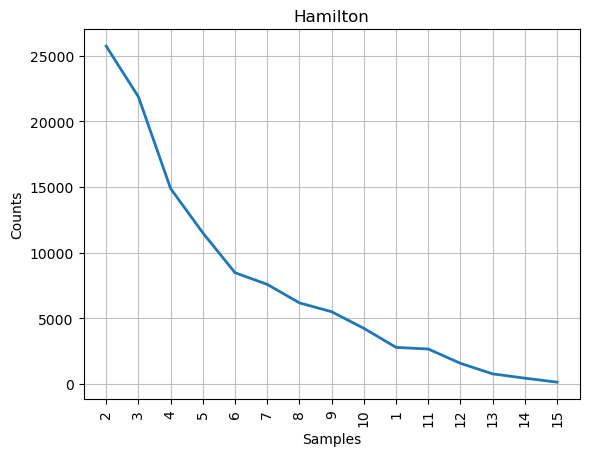

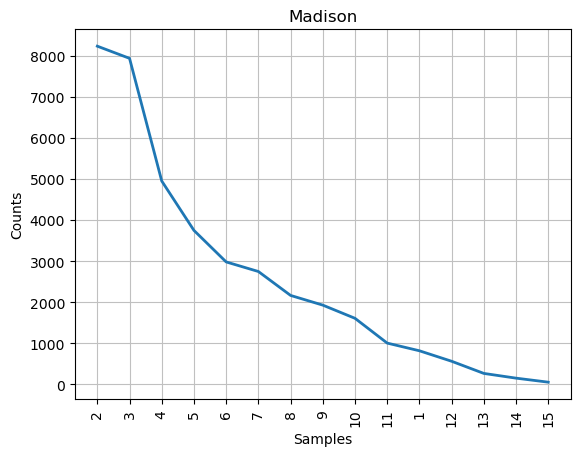

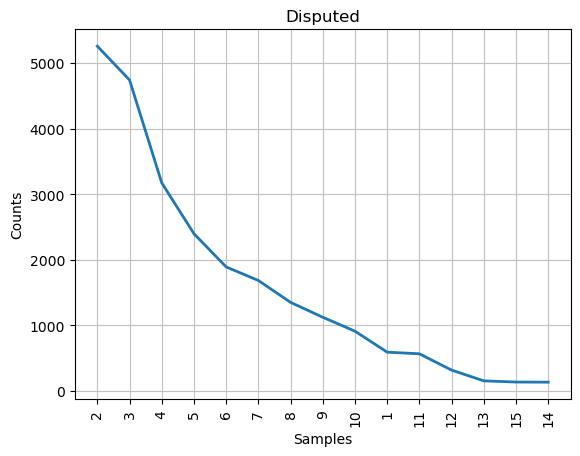

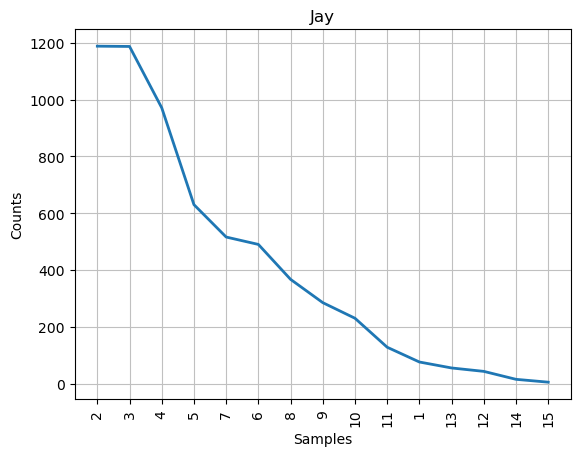

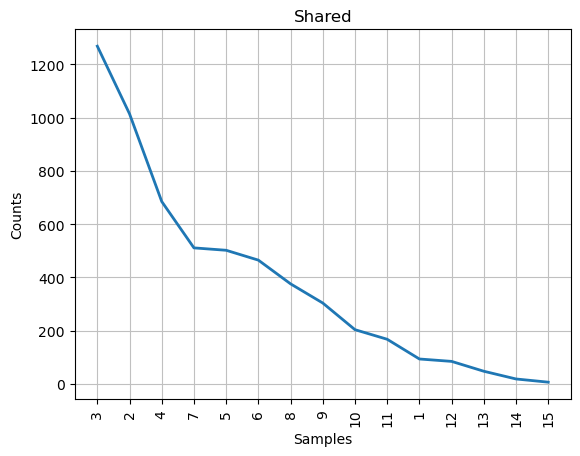

In [10]:
%matplotlib inline

# Compare the disputed papers to those written by everyone, 
# including the shared ones. 
authors = ("Hamilton", "Madison", "Disputed", "Jay", "Shared")

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
for author in authors:
    tokens = nltk.word_tokenize(federalist_by_author[author])
    
    # Filter out punctuation
    federalist_by_author_tokens[author] = ([token for token in tokens 
                                            if any(c.isalpha() for c in token)])
   
    # Get a distribution of token lengths
    token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
    federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    federalist_by_author_length_distributions[author].plot(15,title=author)     

## Second Stylometric Test: Kilgariff's Chi-Squared Method

What is a probability distribution? What does "distance" mean in the way that it is used here? Pay particular attention to the bulleted explanation of how the statistic is applied. In the following section, the code is all written together. See if you can comment out what is happening at each stage and why it matters. 

A probability distribution measures the likelihood that a particular outcome happens. In this case we are looking at the probability of a the most commonly used words by an author are found in a text compared to the actual counts of these words used. 

In [11]:
# Who are the authors we are analyzing?
authors = ("Hamilton", "Madison")

# Lowercase the tokens so that the same word, capitalized or not,
# counts as one word
for author in authors:
    federalist_by_author_tokens[author] = (
        [token.lower() for token in federalist_by_author_tokens[author]])
federalist_by_author_tokens["Disputed"] = (
    [token.lower() for token in federalist_by_author_tokens["Disputed"]])

# Calculate chisquared for each of the two candidate authors
for author in authors:
   
    # First, build a joint corpus and identify the 500 most frequent words in it
    # counts the most common 500 words used in a corpus of the combined texts of 
    # Madison with the disputed text and Hamilton and the disputed text.
    joint_corpus = (federalist_by_author_tokens[author] + 
                    federalist_by_author_tokens["Disputed"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    # What proportion of the joint corpus is made up 
    # of the candidate author's tokens?
    # the total number of different words in used by a single author 
    # is smaller then the total number of different words in the joint corpus
    # the author_share then becomes of a fraction that is less than one
    author_share = (len(federalist_by_author_tokens[author]) 
                    / len(joint_corpus))
    
    # Now, let's look at the 500 most common words in the candidate 
    # author's corpus and compare the number of times they can be observed 
    # to what would be expected if the author's papers 
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:
        
        # How often do we really see this common word?
        # for each of the most common 500 we count how ofen they actually appear 
        # in the Madison or Hamilton text then in the disputed text
        author_count = federalist_by_author_tokens[author].count(word)
        disputed_count = federalist_by_author_tokens["Disputed"].count(word)
        
        # How often should we see it?
        # taking for each of the 500 we take the count and multiply it by the 
        # author_share fraction which gives the 'expected' value 
        # the same is done for the disputed text which is the remaining fraction
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)
        
        # Add the word's contribution to the chi-squared statistic
        # a chisquared calcuation is made for each word using the author counts observed
        # vs. expected and then in the disputed observed vs. expected.
        chisquared += ((author_count-expected_author_count) * 
                       (author_count-expected_author_count) / 
                       expected_author_count)
                    
        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count) 
                       / expected_disputed_count)
        
    print("The Chi-squared statistic for candidate", author, "is", chisquared)

The Chi-squared statistic for candidate Hamilton is 3434.6850314768426
The Chi-squared statistic for candidate Madison is 1907.5992915766838


## Third Stylometric Test: John Burrows' Delta Method (Advanced)

In [12]:
# Who are we dealing with this time?
authors = ("Hamilton", "Madison", "Jay", "Disputed", "Shared")

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += federalist_by_author_tokens[author]
    
# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))
whole_corpus_freq_dist[ :10 ]

[('the', 17745),
 ('of', 11795),
 ('to', 6999),
 ('and', 5012),
 ('in', 4383),
 ('a', 3957),
 ('be', 3770),
 ('that', 2739),
 ('it', 2492),
 ('is', 2177)]

In [13]:
# The main data structure
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {} 
    
    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(federalist_by_author_tokens[author])
    
    # Calculate each feature's presence in the subcorpus
    for feature in features:
        presence = federalist_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall

In [14]:
import math

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean 
    # and standard deviation
    corpus_features[feature] = {}
    
    # Calculate the mean of the frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average
    
    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

In [15]:
feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:
        
        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) / 
                                            feature_stdev)

In [16]:
# Tokenize the test case
testcase_tokens = nltk.word_tokenize(federalist_by_author["TestCase"])
    
# Filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens 
                   if any(c.isalpha() for c in token)]
 
# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall
    
# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])

Test case z-score for feature the is -0.5905131029403456
Test case z-score for feature of is -1.815053228501068
Test case z-score for feature to is 1.080722357197572
Test case z-score for feature and is 1.0546002678666273
Test case z-score for feature in is 0.7425341727883432
Test case z-score for feature a is -0.7962692057857793
Test case z-score for feature be is 1.0279650702511498
Test case z-score for feature that is 1.9604023041278147
Test case z-score for feature it is 0.21265791060592468
Test case z-score for feature is is -0.8792324482592065
Test case z-score for feature which is -2.059010144513673
Test case z-score for feature by is 1.2185982163454618
Test case z-score for feature as is 4.556093784647465
Test case z-score for feature this is -0.651311983665639
Test case z-score for feature not is 0.8424621292127045
Test case z-score for feature would is -0.8419452065894578
Test case z-score for feature for is -0.84301315697513
Test case z-score for feature have is 2.3422900648

In [17]:
for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] - 
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "Delta score for candidate", author, "is", delta )

Delta score for candidate Hamilton is 1.7560432408322548
Delta score for candidate Madison is 1.5981882978381434
Delta score for candidate Jay is 1.5159420162682575
Delta score for candidate Disputed is 1.535744690035478
Delta score for candidate Shared is 1.9064655212964878


## Conclusions and Further Reading and Resources

Consider one of the "Interesting case studies" at the end of the lesson. What are the opportunities / stakes that authorship attribution raises in each case? Are there cases when authorship attribution may not make sense to do? Are there ethical implications? How might/could authorship attribution participate in cultural or archival recovery projects? 

Marcelo Luiz Brocardo, Issa Traore, Sherif Saad, and Isaac Woungang developed a method to [assess authorship of short messages or emails](https://ieeexplore.ieee.org/document/6705711) using the Enron email dataset for their experiment. The study employs n-gram frequency models trained on a known set of authored emails. The model is then used to evaluate its ability to assign authorship to an unknown batch of emails. The authors were motivated by the difficulty of authorship attribution for short texts and the resulting decrease in detection accuracy with a large number of possible authors.

In their conclusion, the authors stated that their stylometric model is intended for identifying authors of short online messages in real-world forensic investigations of online activities. However, the ethical implications of such tools being used by malicious actors to de-anonymize individuals working against their interests is problematic.

The authors plan to enhance their models in future work by adding additional stylometric features beyond n-grams.
